# Fitting FIPT data

In [3]:
import pandas as pd
import fipt # install via: !pip install fipt

In [4]:
import logging
logging.basicConfig(level=logging.INFO)

## Load test data

In [5]:
fn = './test_data_001.csv'

df = pd.read_csv(fn)
df.head()

,Frequency (Hz),Z' (Ohms),"Z"" (Ohms)"
0,300000.0,11.1089,1.555010
1,238298.0,11.1432,1.394260
2,189287.0,11.1805,1.218730
3,150356.0,11.2241,1.044200
4,119432.0,11.2579,0.879109


In [8]:
ipdata =  fipt.ImpedanceData(fn, fn, 
                       f_data = df['Frequency (Hz)'].values,  
                       z_real_data = df['Z\' (Ohms)'].values, 
                       z_imag_data = df['Z\" (Ohms)'].values)

## Fit data

In [11]:
symimfit = fipt.SymmetricImpedanceFitter(impedance_data=ipdata)        
symimfit.sanitize_data()
# symimfit.plot_fit(data_only=True);

# restrict data range
symimfit.set_min_w(None)
symimfit.set_max_z_abs(400)

# use student t likelihood function
symimfit.configure_likelihood(likelihood_config=dict(name='t', scale=1, df=1))

# guess start parameters
start_params = symimfit.guess(make_plots=False)
start_params.pretty_print()

INFO:fipt:Removing data points with -Im(Z)<0
INFO:fipt:z_angle_max_i: 37
INFO:fipt:w_trans: 29.874536


Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
gamma    0.8574      0.5      1.3     None     True     None     None
q_s       0.018     -inf      inf     None     True     None     None
r_ion     69.94       10      inf     None     True     None     None
r_sep     10.68        2      inf     None     True     None     None


In [13]:
# manual configuration of parameters
start_params_1 = start_params
# start_params_1['gamma'].set(value=0.916)
# start_params_1['r_ion'].set(value=50)
# start_params_1['q_s'].set(value=0.004)

# symimfit.plot_fit(params=start_params_1);        
#         symimfit.set_max_z_abs(250)

In [14]:
result = symimfit.fit()        

print(fipt.lmfit.fit_report(result, show_correl=False))

INFO:fipt:Data is restricted to |Z| < 400 Ohm


[[Fit Statistics]]
    # function evals   = 185
    # data points      = 53
    # variables        = 4
    chi-square         = 103.040
    reduced chi-square = 2.103
    Akaike info crit   = 43.236
    Bayesian info crit = 51.117
[[Variables]]
    r_sep:   10.6428679 +/- 0.754053 (7.09%) (init= 10.67749)
    r_ion:   79.0239099 +/- 7.533699 (9.53%) (init= 69.94206)
    gamma:   0.90656126 +/- 0.018367 (2.03%) (init= 0.857364)
    q_s:     0.00309519 +/- 8.37e-05 (2.70%) (init= 0.018)


INFO:fipt:Data is restricted to |Z| < 400 Ohm
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\matplotlib\figure.py:403: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


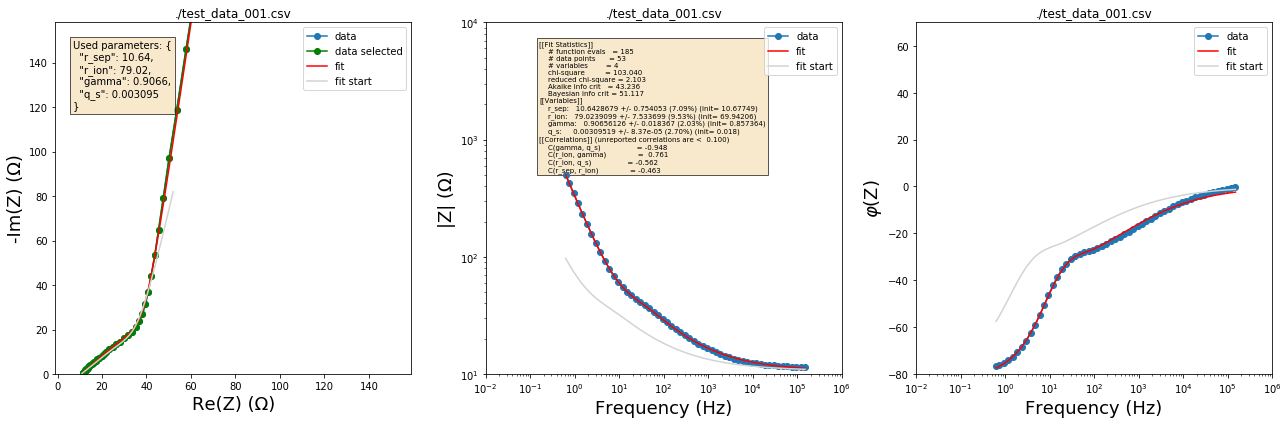

In [15]:
f, ax = symimfit.plot_fit(start_params = start_params_1);
f.show()

In [20]:
result_fns = symimfit.save_results(export_folder='./demo_results')
display(result_fns)

INFO:fipt:Using base file name: ./test_data_001.csv
INFO:fipt:Using export folder: demo_results
INFO:fipt:Data is restricted to |Z| < 400 Ohm


Name      Value      Min      Max   Stderr     Vary     Expr Brute_Step
gamma    0.9066      0.5      1.3  0.01837     True     None     None
q_s    0.003095     -inf      inf 8.368e-05     True     None     None
r_ion     79.02       10      inf    7.534     True     None     None
r_sep     10.64        2      inf   0.7541     True     None     None


(None,
 'demo_results\\test_data_001.csv.fit.report.txt',
 'demo_results\\test_data_001.csv.fit.result_full.json',
 'demo_results\\test_data_001.csv.fit.result_params.json',
 'demo_results\\test_data_001.csv.fit.result_simple.json',
 'demo_results\\test_data_001.csv.fit.plot.png')